In [29]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [510]:
def get_samples(N = 100):
    np.random.seed(21)
    X = np.random.normal(0, 1, N)
    y = X + 2*np.random.normal(0, 0.5, N) + 3
    return X, y
    

In [511]:
def get_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1, input_shape=(1,)))
    model.summary()
    model.compile(optimizer='SGD', loss='mse')
    return model

In [512]:
def get_coefs(model):
    beta_1 = model.weights[0].numpy()[0][0]
    beta_0 = model.weights[1].numpy()[0]
    return beta_0, beta_1

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


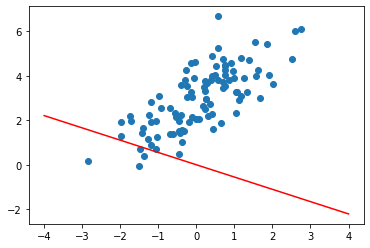

In [513]:
X, y = get_samples()
model = get_model()

plt.scatter(X, y)
x_line = np.linspace(-4, 4, 100)
plt.plot(x_line, model.predict(x_line), color='r')

In [514]:
loss = [model.evaluate(X, y, verbose=0)]
beta_0, beta_1 = get_coefs(model)
beta_0s = [beta_0]
beta_1s = [beta_1]

Text(0.5, 1.0, 'Beta 1')

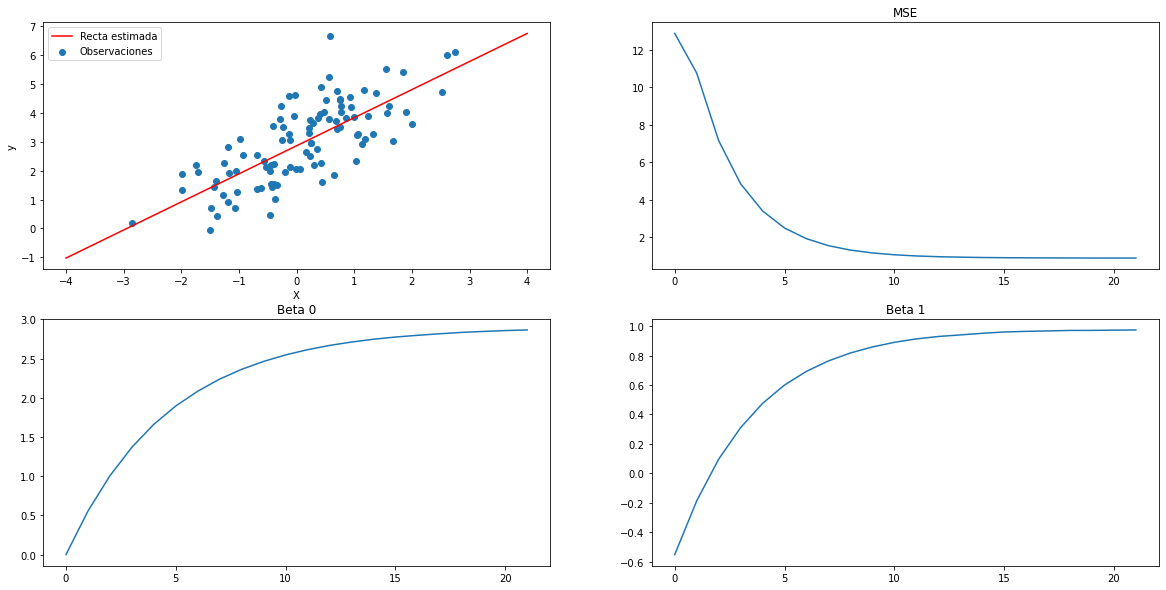

In [535]:
history = model.fit(X, y, epochs=1, verbose=0, batch_size=10)
f, ax = plt.subplots(2, 2, figsize=(20, 10))
ax= ax.reshape(-1)
ax[0].scatter(X, y, label='Observaciones')
ax[0].plot(x_line, model.predict(x_line), color='r', label='Recta estimada')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
loss.append(history.history['loss'][0])
ax[1].plot(loss)
ax[1].set_title('MSE')
ax[0].legend()

beta_0, beta_1 = get_coefs(model)
beta_0s.append(beta_0)
beta_1s.append(beta_1)
ax[2].plot(beta_0s)
ax[2].set_title('Beta 0')
ax[3].plot(beta_1s)
ax[3].set_title('Beta 1')